In [21]:
from sagas.conf.conf import cf
from sagas.nlu.ruleset_procs import parse_sents, equals, group_by, children

def get_aux_domain(sent):
    rs = []
    for word in filter(lambda w: w.upos == "AUX", sent.words):
        # dc=sent.words[word.governor-1]
        if word.governor == 0:
            # if the aux word is root; (这种情形会出现在德语依存分析中, 但在英语依存分析中是正常的)
            dc = word
            delegator=True
        else:
            dc = sent.words[word.governor - 1]
            delegator=False
        # print('℗', word.text, word.dependency_relation, word.governor, '☇' , dc.text)
        # print('\t', dc.index, dc.text, get_children_list(sent, dc))
        domains = []
        # stems = []
        # 需要收集的是aux单词依赖的对象的关联集, 而不是aux单词自身的关联集
        for c in filter(lambda w: equals(w.governor, dc.index), sent.words):
            # print('\t', c.index, c.text, get_children_list(sent, c))
            # domains.append((c.dependency_relation, c.index, c.text, c.lemma,
            #                 get_children_list(sent, c), get_word_features(c)))
            # add_domain(domains, stems, c, sent)
            c_domains = [w.ctx for w in children(c, sent)]
            domains.append({**c.ctx, **group_by(c_domains)})
        
        token = {**word.ctx, **group_by(domains)}
        # add_head(domains, dc, sent)
        if dc.governor != 0:
            head = sent.words[dc.governor - 1]
            token['head'] = head.ctx
            
        rs.append(token)
        # rs.append({'type':'aux_domains', 'word': word.text, 'lemma':word.lemma,
        #           'rel': word.dependency_relation, 'governor': word.governor, 'head': dc.text,
        #           'head_pos': dc.upos.lower(), 'delegator':delegator,
        #           'index': word.index, 'domains': domains, 'stems':stems})
    return rs

def get_subj_domain(sent):
    rs = []
    for word in filter(lambda w: w.dependency_relation.endswith('subj'), sent.words):
        dc=sent.words[word.governor-1]
        # print('℗', word.text, word.dependency_relation, word.governor, '☇' , dc.text)
        domains = []
        stems = []
        # 需要收集的是subj依赖的对象的关联集
        for c in filter(lambda w: equals(w.governor, dc.index), sent.words):
            # print('\t', c.index, c.text, get_children_list(sent, c))
            # domains.append((c.dependency_relation, c.index, c.text, c.lemma,
            #                 get_children_list(sent, c), get_word_features(c)))
            # add_domain(domains, stems, c, sent)
            c_domains = [w.ctx for w in children(c, sent)]
            domains.append({**c.ctx, **group_by(c_domains)})

        # add_head(domains, dc, sent)
        token = {**word.ctx, **group_by(domains)}
        print(dc.text, dc.governor, dc.dependency_relation)
        if dc.governor != 0:
            head = sent.words[dc.governor - 1]
            token['head'] = head.ctx
            
        rs.append(token)
        # rs.append({'type':'subj_domains', 'word': word.text, 'lemma':word.lemma,
        #           'rel': word.dependency_relation, 'governor': word.governor, 'head': dc.text,
        #           'head_pos': dc.upos.lower(), 'head_feats':[dc.lemma, dc.upos, dc.xpos],
        #           'index': word.index, 'domains': domains, 'stems':stems})
    return rs

lang='en'
sents='what will be the weather in three days?'
data = {'lang': lang, "sents": sents, 'engine': cf.engine(lang)}
doc_jsonify, resp = parse_sents(data)
domains = get_aux_domain(doc_jsonify)
domains

[{'index': '2',
  'text': 'will',
  'lemma': 'will',
  'upos': 'AUX',
  'xpos': 'MD',
  'feats': 'VerbForm=Fin',
  'governor': 5,
  'dependency_relation': 'aux',
  'punct': [{'index': '9',
    'text': '?',
    'lemma': '?',
    'upos': 'PUNCT',
    'xpos': '.',
    'feats': '_',
    'governor': 5,
    'dependency_relation': 'punct'}],
  'aux': [{'index': '2',
    'text': 'will',
    'lemma': 'will',
    'upos': 'AUX',
    'xpos': 'MD',
    'feats': 'VerbForm=Fin',
    'governor': 5,
    'dependency_relation': 'aux'}],
  'nsubj': [{'index': '1',
    'text': 'what',
    'lemma': 'what',
    'upos': 'PRON',
    'xpos': 'WP',
    'feats': 'PronType=Int',
    'governor': 5,
    'dependency_relation': 'nsubj'}],
  'det': [{'index': '4',
    'text': 'the',
    'lemma': 'the',
    'upos': 'DET',
    'xpos': 'DT',
    'feats': 'Definite=Def|PronType=Art',
    'governor': 5,
    'dependency_relation': 'det'}],
  'nmod': [{'index': '8',
    'text': 'days',
    'lemma': 'day',
    'upos': 'NOUN',


In [22]:
lang='ru'
sents='Яблоко - это здоровый фрукт.'
data = {'lang': lang, "sents": sents, 'engine': cf.engine(lang)}
doc_jsonify, resp = parse_sents(data)
domains = get_subj_domain(doc_jsonify)
domains

фрукт 0 root


[{'index': '1',
  'text': 'Яблоко',
  'lemma': 'яблоко',
  'upos': 'NOUN',
  'xpos': '_',
  'feats': 'Animacy=Inan|Case=Nom|Gender=Neut|Number=Sing',
  'governor': 5,
  'dependency_relation': 'nsubj',
  'amod': [{'index': '4',
    'text': 'здоровый',
    'lemma': 'здоровый',
    'upos': 'ADJ',
    'xpos': '_',
    'feats': 'Case=Nom|Degree=Pos|Gender=Masc|Number=Sing',
    'governor': 5,
    'dependency_relation': 'amod'}],
  'nsubj': [{'index': '1',
    'text': 'Яблоко',
    'lemma': 'яблоко',
    'upos': 'NOUN',
    'xpos': '_',
    'feats': 'Animacy=Inan|Case=Nom|Gender=Neut|Number=Sing',
    'governor': 5,
    'dependency_relation': 'nsubj',
    'punct': [{'index': '2',
      'text': '-',
      'lemma': '-',
      'upos': 'PUNCT',
      'xpos': '_',
      'feats': '_',
      'governor': 1,
      'dependency_relation': 'punct'}]}],
  'punct': [{'index': '6',
    'text': '.',
    'lemma': '.',
    'upos': 'PUNCT',
    'xpos': '_',
    'feats': '_',
    'governor': 5,
    'dependency_

✁ dependency-graph. -------------------------
+----+---------+----------+----------+--------+--------+
|    |   index | text     | lemma    | upos   | xpos   |
|----+---------+----------+----------+--------+--------|
|  0 |       1 | Яблоко   | яблоко   | NOUN   | _      |
|  1 |       2 | -        | -        | PUNCT  | _      |
|  2 |       3 | это      | это      | PRON   | _      |
|  3 |       4 | здоровый | здоровый | ADJ    | _      |
|  4 |       5 | фрукт    | фрукт    | NOUN   | _      |
|  5 |       6 | .        | .        | PUNCT  | _      |
+----+---------+----------+----------+--------+--------+


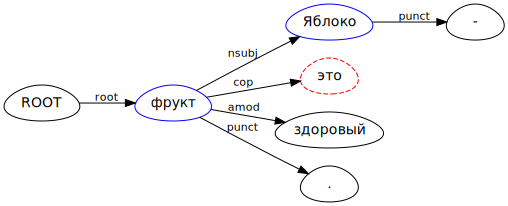

In [23]:
from sagas.nlu.uni_remote_viz import list_contrast, display_doc_deps
display_doc_deps(doc_jsonify, resp)